## project 2: Face Recognition

### Import packages  


In [88]:
import glob
import PIL
from PIL import Image 
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from math import sqrt

### Load Images

In [89]:
# function of load an image
def load_img(Img_path): 
  #load image with PIL.Image
  Img = Image.open(Img_path)
  #print infomation of image
  print("shape of input image:",Img.format, Img.size, Img.mode)
  #convert image to numpy array
  darray = np.array(Img,dtype = int)
  global h,w,pix
  #define the global value of height and width of image in order to output images
  h = darray.shape[0] 
  w = darray.shape[1]
  pix = h*w
  #translate a matrix of image data to a row of data
  darray = darray.reshape(pix)
  return darray

In [90]:
# load a set of images from folder 
# set title of image as label of image
# e.g. subject01.happy.jpg to subject01
def load_set(folder_path):
  #glob.glob return a list of pathnames that match pathname
  path = glob.glob(folder_path)
  path.sort() #load images as name order
  #initialize set of image and set of labels
  img_set = []
  label = []
  #load every image in the folder
  for img in path:
    print((Path(img).name).split(".")[0])
    label.append((Path(img).name).split(".")[0]) # choose the first string split by . as label
    n = load_img(img) #load image by using function load_img
    img_set.append(n)
  img_set = np.array(img_set)
  return img_set,label

In [91]:
# load training images
tr_img,tr_label = load_set("/content/trainIMG/*.jpg")

subject01
shape of input image: JPEG (195, 231) L
subject02
shape of input image: JPEG (195, 231) L
subject03
shape of input image: JPEG (195, 231) L
subject07
shape of input image: JPEG (195, 231) L
subject10
shape of input image: JPEG (195, 231) L
subject11
shape of input image: JPEG (195, 231) L
subject14
shape of input image: JPEG (195, 231) L
subject15
shape of input image: JPEG (195, 231) L


In [92]:
# load test images
ts_img,ts_label = load_set("/content/testIMG/*.jpg")

subject01
shape of input image: JPEG (195, 231) L
subject07
shape of input image: JPEG (195, 231) L
subject11
shape of input image: JPEG (195, 231) L
subject14
shape of input image: JPEG (195, 231) L
subject14
shape of input image: JPEG (195, 231) L


In [93]:
# define a function of show image
def show_img(x):
  plt.imshow(x.reshape((h,w)),cmap=plt.cm.gray) # reshape row data to matrix h*w and show the image
  plt.xticks([])

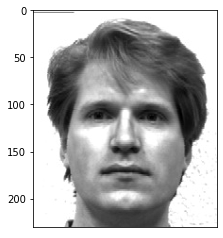

In [94]:
# check the loaded train image set
show_img(tr_img[0])

## Eigenface Training

### mean face  
mean face: taking the average of the M training face images  
subtract the mean face m from training face  

In [95]:
# function to find mean face and centered image
def get_mean_face(img_set):
  num = img_set.shape[0]
  sum = np.zeros((img_set.shape[1]))
  for i in range(0,num):
    sum = sum + img_set[i]
  average = sum/num # take average of the M training face images
  print("show the mean face:")
  show_img(average)
  # Ri-m (subtract the mean face from training face)
  # matrix A
  centered = img_set - average
  return average, centered


show the mean face:


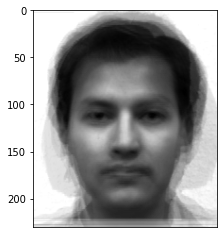

In [96]:
mean_face,centered_tr = get_mean_face(tr_img)

In [97]:
centered_tr.shape # actually it is AT

(8, 45045)

In [98]:
#save mean face image
plt.imsave("mean_face.jpg",mean_face.reshape((h,w)),cmap=plt.cm.gray)

### eigen face coefficients & eigen faces

In [99]:
#Eigenface coefficients of training images
def M_eigen(centered_set):
  # covariance matrix L= ATA
  L = np.dot(centered_set ,np.transpose(centered_set))
  # find eigen value of L
  eig_w,eig_v = np.linalg.eig(L)
  # U= AV, M eigen faces
  U = np.dot(np.transpose(centered_tr),eig_v)
  # scaled U in order to display eigen face images
  Umax = np.max(U)
  Umin = np.min(U)
  U_scaled = (U-Umin)*255/(Umax-Umin)
  # eigenface coefiicients = UT*centered Ri
  eig_coef = np.dot(np.transpose(U),np.transpose(centered_tr))
  return eig_coef,U,U_scaled

In [100]:
tr_coef,U,eigenface = M_eigen(centered_tr)

In [101]:
#eigen coefficients
print("eigenface coefficient of training images:\n",tr_coef)

eigenface coefficient of training images:
 [[-7.58393182e+07  8.55914694e+07  6.79094869e+07  1.59365384e+08
  -2.57010807e+07 -3.09965508e+08 -5.48035678e+07  1.53443135e+08]
 [ 9.86591897e+07 -5.32769258e+07  2.86096157e+07 -5.98976188e+07
   5.31036358e+07 -1.01569225e+08  7.56177219e+07 -4.12463935e+07]
 [-3.00830625e-09 -5.70791492e-08  5.29824988e-09  4.63116668e-08
   9.27929763e-09 -2.39071291e-08  2.95416364e-08 -6.43626618e-09]
 [-7.35308451e+07 -4.35819945e+04 -2.11976451e+07  3.62392288e+07
   7.67395071e+07 -7.23282904e+06  4.07897743e+07 -5.17636090e+07]
 [ 2.03390545e+07 -1.02912808e+07 -9.00930120e+06  2.39421030e+07
   1.13657321e+07  3.43527729e+05 -2.52009615e+07 -1.14888738e+07]
 [ 2.09059360e+07  7.27564771e+07 -6.14469992e+07 -2.99666082e+07
   2.13665227e+07 -1.38164759e+07 -9.97235825e+06  1.73505791e+05]
 [-1.34689494e+07 -2.36191334e+07  3.38368115e+06 -3.11659201e+07
   4.79155988e+07  4.01893283e+06 -2.99136079e+07  4.28493981e+07]
 [ 4.95663886e+06 -2.56112

display eigen face



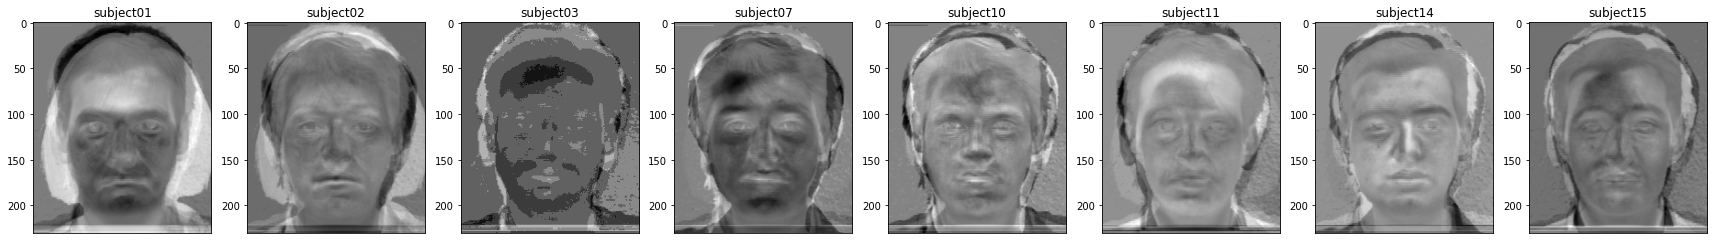

In [102]:
# 8 eigen faces from training images
# display and save images
print("display eigen face\n")
plt.figure(figsize=(30,60))
nplt = centered_tr.shape[0]
for i in range(nplt):
  plt.subplot(1,nplt,i+1)
  plt.title(tr_label[i]) # display label as title
  show_img(np.transpose(eigenface)[i]) # display images
  plt.imsave(tr_label[i] + ".jpg",np.transpose(eigenface)[i].reshape((h,w)),cmap=plt.cm.gray) # save eigen face images
plt.show()

## Eigenface Recognition

In [103]:
# dist(OmegaI,Omegai)
def euclidean_dist(v0,v):
    # compute distances of an input image and training images
    distances = [sqrt(np.sum((v0-x)**2)) for x in v] # for every input and x in training images, calculate distance
    distances = np.asarray(distances)
    return distances

In [104]:
# output label of input images
def recog_test(test_set,train_coef,mean,U):
  # subtract m from input face
  # I' = I-m
  input_centered = test_set- mean
  # OmegaI = UT*I'
  # OmegaI,eigen face coefficients, compute its projection onto face space 
  ts_coef = np.dot(np.transpose(U),np.transpose(input_centered))
  tr_ct = np.transpose(train_coef)
  ts_ct = np.transpose(ts_coef)
  pred_label = []
  # for every input images
  for i in range(ts_ct.shape[0]):
    dis = euclidean_dist(ts_ct[i],tr_ct) # return a numpy with distances between input image and training images
    result = np.where(dis==np.min(dis)) # find the minimize value, return information of its index
    pred = tr_label[result[0][0]] # get the label of input image
    pred_label.append(pred) # add this prediction label to dataset
  return ts_coef,pred_label

In [105]:
ts_coef,plabel = recog_test(ts_img,tr_coef,mean_face,U)
print("recognition results:\n",plabel)
print("eigenface coefficients:\n",ts_coef)

recognition results:
 ['subject01', 'subject07', 'subject11', 'subject14', 'subject14']
eigenface coefficients:
 [[-2.84226819e+07  1.03893380e+08 -2.91280480e+08 -3.72003742e+07
  -3.09557722e+07]
 [ 6.21657618e+07 -9.15597753e+06 -1.07981032e+08  7.23552596e+07
   6.21419290e+07]
 [-9.33421284e-09  1.49104062e-08 -2.73022549e-08  2.88290201e-08
   2.54141994e-08]
 [-5.58402336e+07  2.31395182e+07 -8.07984970e+06  2.01072900e+07
   4.11282105e+07]
 [ 1.39551196e+07  9.78874352e+05 -3.16856693e+06 -1.10391535e+07
  -1.89530184e+07]
 [ 2.39919521e+07 -3.10262255e+06 -8.84253231e+06 -1.16749219e+07
  -9.12193903e+06]
 [-1.56038461e+07 -4.00701970e+06 -2.77433359e+06 -3.12504845e+07
  -3.02355547e+07]
 [-4.88745009e+05  6.01476791e+06  1.23549801e+06  1.93984877e+07
   1.57609187e+07]]


In [106]:
# recognition accuracy
def recog_acc(pred_label,test_label):
  count = len(pred_label)
  corr = 0
  for i in range(count):
    if(pred_label[i]==test_label[i]):
      corr = corr+1 # correct recognitions
  return (corr/count)# correct recognitions/5

In [107]:
print("recognition accuracy for the test dataset:",recog_acc(plabel,ts_label))

recognition accuracy for the test dataset: 1.0
